In [5]:
def sub():
    yield from [1, 2]

def main():
    yield 0
    yield from sub()
    yield 3

print(list(main()))

[0, 1, 2, 3]


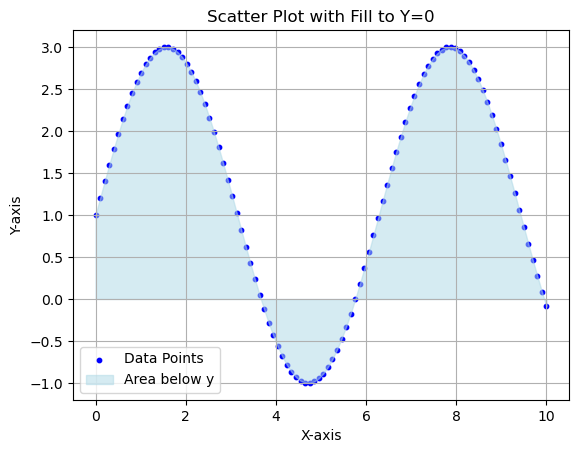

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate Data
x = np.linspace(0, 10, 100)
y = np.sin(x) * 2 + 1 # Example y-values

# 2. Create Scatter Plot
plt.scatter(x, y, label='Data Points', color='blue', s=10)

# 3. Fill Between y and y=0
plt.fill_between(x, y, 0, color='lightblue', alpha=0.5, label='Area below y')

# 4. Add Labels, Title, and Legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Fill to Y=0')
plt.grid(True)
plt.legend()

# 5. Display Plot
plt.show()

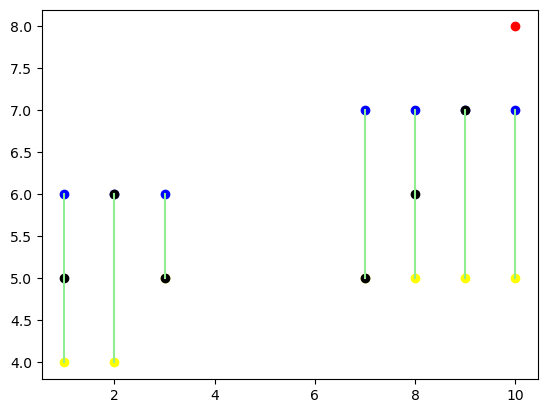

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


time = [1, 2, 3, 7, 8, 9, 10]
data = [5, 6, 5, 5, 6, 7, 8]
lower_limit = [4, 4, 5, 5, 5, 5, 5]
upper_limit = [6, 6, 6, 7, 7, 7, 7]

# put data into dataframe and identify which points are out of range (not between the lower and upper limit)
df = pd.DataFrame({'time': time, 'data': data, 'll': lower_limit, 'ul': upper_limit})
df.loc[:, 'in_range'] = 0
df.loc[((df['data'] >= df['ll']) & (df['data'] <= df['ul'])), 'in_range'] = 1

# make the plot
fig, ax = plt.subplots()

# plot lower-limit and upper-limit points
plt.scatter(df['time'], df['ll'], c='yellow')
plt.scatter(df['time'], df['ul'], c='blue')

# plot data points in range
plt.scatter(df.loc[df['in_range']==1, :]['time'], df.loc[df['in_range']==1, :]['data'], c='black')

# plot data points out of range (in red)
plt.scatter(df.loc[df['in_range']==0, :]['time'], df.loc[df['in_range']==0, :]['data'], c='red')

# plot lines between lower limit and upper limit
plt.plot((df['time'],df['time']),([i for i in df['ll']], [j for j in df['ul']]), c='lightgreen')
# 5. Display Plot
plt.show()

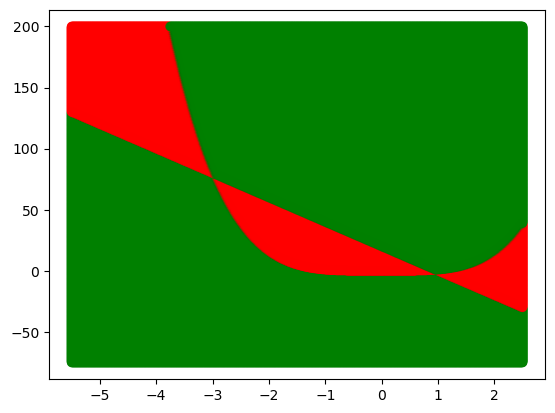

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

#matplotlib inline

yLow,yHigh = (-75,200)
xLow,xHigh = (-5.5,2.5)

x = np.linspace(xLow,xHigh,1000)

X,Y = np.meshgrid(x,np.linspace(yLow,yHigh,1000))

Z = ( (Y<X**4) & (Y>-20*X +20) ) | ( (Y>X**4) & (Y<-20*X +20) )

plt.scatter( X , Y, c=Z, cmap=ListedColormap(['green','red']), alpha=0.5)
plt.show()

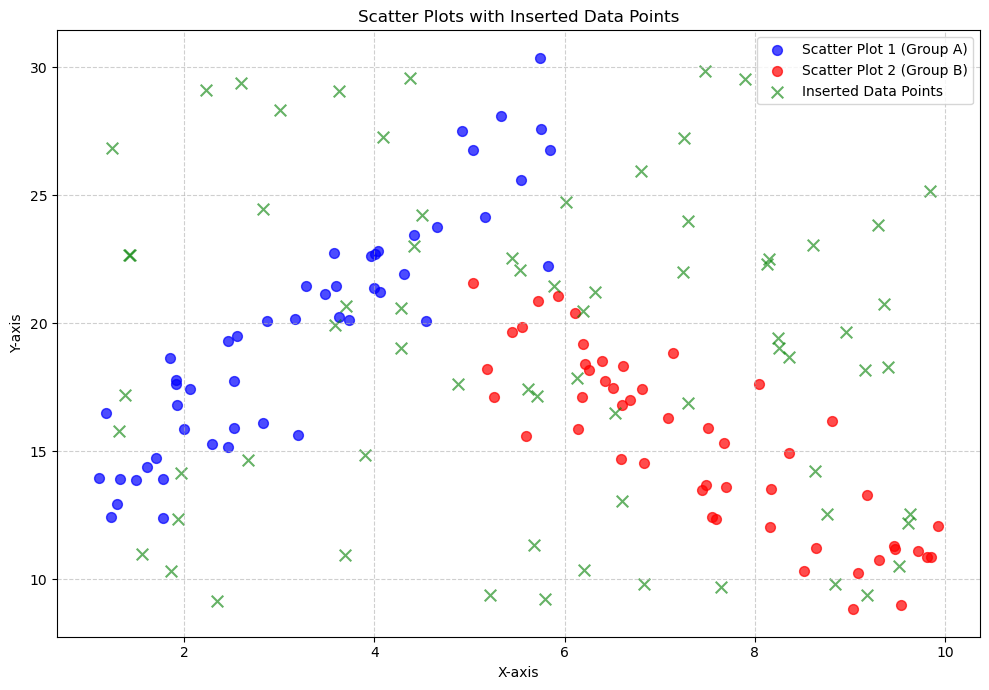

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Create a directory for saving plots if it doesn't exist
plot_dir = 'plots'
os.makedirs(plot_dir, exist_ok=True)

# 1. Generate dummy data for two scatter plots
np.random.seed(42) # for reproducibility

# Data for Scatter Plot 1 (e.g., 'Group A')
num_points_1 = 50
x1 = np.random.rand(num_points_1) * 5 + 1 # X values between 1 and 6
y1 = 3 * x1 + np.random.randn(num_points_1) * 2 + 10 # Linear relationship + noise

# Data for Scatter Plot 2 (e.g., 'Group B')
num_points_2 = 50
x2 = np.random.rand(num_points_2) * 5 + 5 # X values between 5 and 10
y2 = -2 * x2 + np.random.randn(num_points_2) * 2 + 30 # Different linear relationship + noise

# 2. Define the "between" region
# Calculate the overall min/max for X and Y from both scatter plots
min_x_overall = min(x1.min(), x2.min())
max_x_overall = max(x1.max(), x2.max())
min_y_overall = min(y1.min(), y2.min())
max_y_overall = max(y1.max(), y2.max())

# Optionally, you can define a more specific "middle" range
# For example, if you want points strictly between the average Y values of the two groups
# This is more complex if the groups are not linearly separable or have complex shapes.
# For simplicity, we'll use the overall bounding box.

# 3. Generate new data points to insert between the two plots
num_inserted_points = 70
# Generate X values within the overall X range
inserted_x = np.random.uniform(min_x_overall, max_x_overall, num_inserted_points)
# Generate Y values within the overall Y range
inserted_y = np.random.uniform(min_y_overall, max_y_overall, num_inserted_points)

# If you want the inserted points to be truly "between" two distinct clusters,
# a more sophisticated approach might involve:
# - Finding the centroids of the two clusters.
# - Generating points along the line connecting the centroids.
# - Or, using density estimation to find low-density regions between clusters.
# For this general request, random sampling within the bounding box is a good starting point.

# 4. Graph all three sets of data
plt.figure(figsize=(10, 7))

# Plot the first scatter data
plt.scatter(x1, y1, color='blue', label='Scatter Plot 1 (Group A)', alpha=0.7, s=50)

# Plot the second scatter data
plt.scatter(x2, y2, color='red', label='Scatter Plot 2 (Group B)', alpha=0.7, s=50)

# Plot the inserted data points
plt.scatter(inserted_x, inserted_y, color='green', label='Inserted Data Points', alpha=0.6, marker='x', s=70)

# Add titles and labels
plt.title('Scatter Plots with Inserted Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot
#plot_path = os.path.join(plot_dir, 'scatter_plots_with_inserted_data.png')
#plt.savefig(plot_path)
plt.show()
#print(f"Plot saved to {plot_path}")

# Display the plot (optional, won't show in environments without display)
# plt.show()

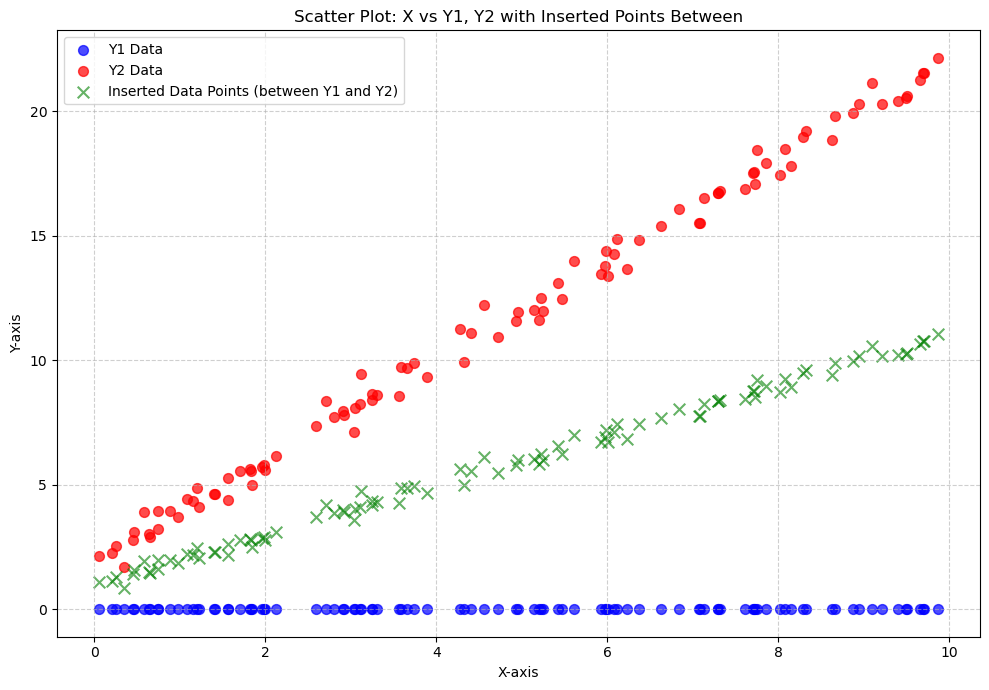

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Create a directory for saving plots if it doesn't exist
plot_dir = 'plots'
os.makedirs(plot_dir, exist_ok=True)

# 1. Create a sample Pandas DataFrame
np.random.seed(42) # for reproducibility

num_points = 100
data = {
    'x': np.sort(np.random.rand(num_points) * 10), # Sorted x for clearer visualization
}

# Generate y1 and y2 such that y2 is generally greater than y1
#data['y1'] = 0.5 * data['x'] + np.random.randn(num_points) * 0.5 + 2
#data['y2'] = 0.5 * data['x'] + np.random.randn(num_points) * 0.5 + 5

data['y2'] = 2 * data['x'] + np.random.randn(num_points) * 0.5 + 2
data['y1'] = 0 * data['x']
df = pd.DataFrame(data)

# Ensure y2 is always greater than y1 for each x to define a clear "between" region
# If y2 happens to be less than y1, we adjust y2 to be at least y1 + a minimum gap
min_gap_for_clarity = 0.5
df['y2'] = np.maximum(df['y2'], df['y1'] + min_gap_for_clarity)

# 2. Generate extra scatter points between df['y1'] and df['y2'] using the same df['x']
# For each row, generate a random number between y1 and y2
#df['y_inserted'] = [np.random.uniform(df['y1'].iloc[i], df['y2'].iloc[i]) for i in range(num_points)]

def inserted_points(y1,y2)
    n = int(np.abs(y2-y1))
    y = 
# Alternatively, for a simple middle line:
df['y_inserted'] = (df['y1'] + df['y2']) / 2




# 3. Scatter plot all three sets of data
plt.figure(figsize=(10, 7))

# Plot df['x'] versus df['y1']
plt.scatter(df['x'], df['y1'], color='blue', label='Y1 Data', alpha=0.7, s=50)

# Plot df['x'] versus df['y2']
plt.scatter(df['x'], df['y2'], color='red', label='Y2 Data', alpha=0.7, s=50)

# Plot the inserted points (df['x'] versus df['y_inserted'])
plt.scatter(df['x'], df['y_inserted'], color='green', label='Inserted Data Points (between Y1 and Y2)', alpha=0.6, marker='x', s=70)

# Add titles and labels
plt.title('Scatter Plot: X vs Y1, Y2 with Inserted Points Between')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot
#plot_path = os.path.join(plot_dir, 'df_scatter_x_y1_y2_with_inserted.png')
#plt.savefig(plot_path)

#print(f"Plot saved to {plot_path}")

# Display the plot (optional, won't show in environments without display)
plt.show()

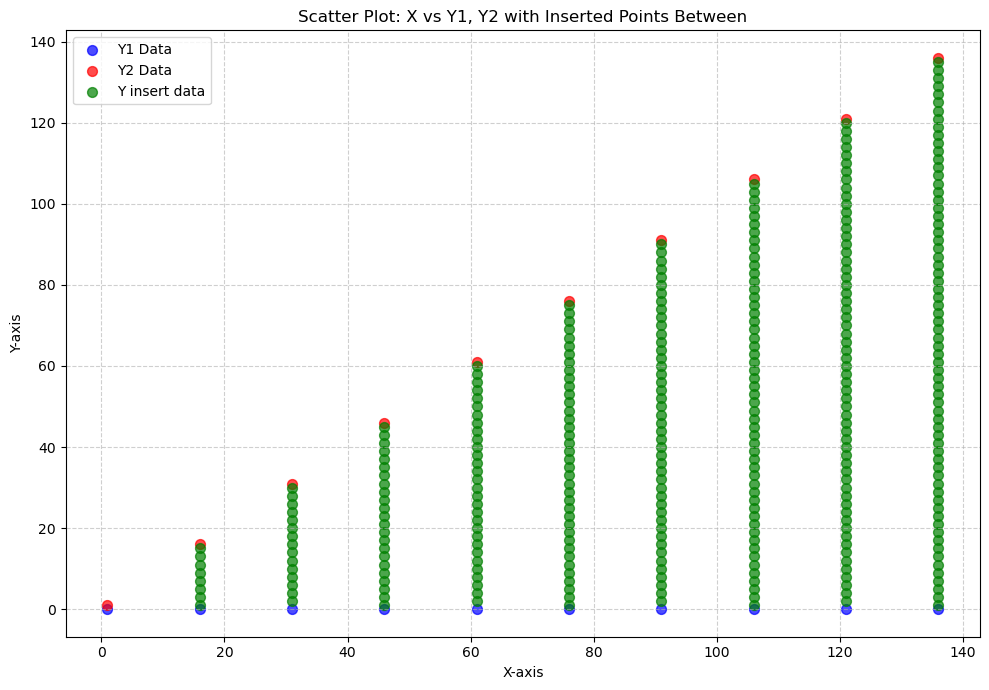

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def add_points(x, y1, y2):
    #x,y1,y2 are all single values
    #number of points
    num_step = int(np.abs(y1 - y2))

    #length of 2 points
    dis = 2
    
    new_x = []
    new_y = []
    
    for i in range(1,num_step,dis):
        new_x.append(x)
        new_y.append(max(y1,y2)-i)
    return new_x,new_y

def get_new_x(row):
    x,y = add_points(row['x'], row['y1'],row['y2'])
    return x
def get_new_y(row):
    x,y = add_points(row['x'], row['y1'],row['y2'])
    return y
def flatten_values(a):
    #x = df['x'].values.flatten().tolist()
    x = a.values.flatten().tolist()
    new_x = [item for sublist in x for item in sublist]
    return new_x

data = {
    'x': np.arange(1,150,15), # Sorted x for clearer visualization
}

# Generate y1 and y2 values based on x
data['y1'] = 0 * data['x']
data['y2'] = 1 * data['x']

#data['y3'] = data['x'] * random.choice([1, -1])
#data['y4'] = 2 * data['x'] * random.choice([1, -1]) 

df = pd.DataFrame(data)
df['y5'] = np.random.choice([1, -1], size=len(df))



#filtered 
#df = df[df['y5'] == 1]

distance = 5 #distance filled

df['new_x'] = df.apply(get_new_x, axis = 1)
df['new_y'] = df.apply(get_new_y, axis = 1)

new_x1 = flatten_values(df['new_x'])
new_y1 = flatten_values(df['new_y'])

df.to_csv('data_1.csv')
# 3. Scatter plot all three sets of data
plt.figure(figsize=(10, 7))

# Plot df['x'] versus df['y1']
plt.scatter(df['x'], df['y1'], color='blue', label='Y1 Data', alpha=0.7, s=50)

# Plot df['x'] versus df['y2']
plt.scatter(df['x'], df['y2'], color='red', label='Y2 Data', alpha=0.7, s=50)
# Plot the inserted points (df['new_x'] versus df['new_y'])
plt.scatter(new_x1, new_y1, color='green', label='Y insert data', alpha=0.7, s=50)


# Add titles and labels
plt.title('Scatter Plot: X vs Y1, Y2 with Inserted Points Between')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the plot (optional, won't show in environments without display)
plt.show()



